# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Within this report, I will investigate the FBI Gun Data which can sourced [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf). This data includes the NCIS data of firearm checks by month, state, and type. As well as US Census Data, usually for 2016, by state. The GitHub repository for the data can be found [here](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md).

The questions I will answer are the following:

>What group is most associated with high permits per capita?

>Which states have had the highest growth in gun registrations as measured by increasing background check requests?

>What is the overall trend of gun purchases?

In [1]:
# import required packages and allow plt to output in the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load and inspect gun data
gun_data_dirty = pd.read_excel(r'C:\Users\jraynes001\Documents\Training\Python Training\Digital Learning Path - Data and Analytics Data Wrangling\Investigate a Dataset Project\gun_data.xlsx')
gun_data_dirty.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [30]:
# load and inspect census data
census_data = pd.read_csv(r'C:\Users\jraynes001\Documents\Training\Python Training\Digital Learning Path - Data and Analytics Data Wrangling\Investigate a Dataset Project\census_data.csv')
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Data Cleaning

#### Gun Data
After inspecting the gun data, there are data cleaning steps necessary to get the file ready for analysis. I'll need to isolate the data I intend to analyze. I'll focus my analysis on the following: permit, permit_recheck, handgun, long_gun, other, multiple, admin, and total. Thus, I'll remove the unneeded columns. 

Next, I explored missing data. With the misisng data, as Instances that are blank should be replaced with 0 to keep data consistency. Finally, I'll explore the duplicate data, if any.

In [4]:
# clean gun data

# inspect columns
gun_data_dirty.columns

#drop unneeded columns
gun_data_dirty.drop(columns = ['prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], inplace = True)

In [5]:
# make the month into a datetime format
gun_data_dirty['month'] = pd.to_datetime(gun_data_dirty.month)

In [6]:
# explore missing data
gun_data_dirty.isna().sum()

month                 0
state                 0
permit               24
permit_recheck    11385
handgun              20
long_gun             19
other              6985
multiple              0
admin                23
totals                0
dtype: int64

In [7]:
# explore duplicates
gun_data_dirty.duplicated().sum()

0

In [8]:
# fill empty cells with 0
gun_data_dirty.fillna(0)
gun_data = gun_data_dirty

#### Census Data
I intend to focus my analysis on the following metrics via the census data: poulation estimates V2016 and the percentage data by race. I'll need to cross-tab the columns to match that gun data style as well as remove unneeded rows.

I also explored misisng values, which, after conversion to percentages, were replaced with 0. Finally, I explored duplicate data.

In [31]:
# removing unneeded rows
census_data.drop(census_data.index[1:12], inplace = True)
census_data.drop(census_data.index[10:], inplace = True)
census_data.drop('Fact Note', axis = 1, inplace = True)

In [32]:
# reset the index
census_data = census_data.reset_index(drop = True)

In [33]:
# explore duplicates
census_data.duplicated().sum()

0

In [11]:
# get lines with % values
cd_percent = census_data[1:8]

# get base value
cd_base = census_data[:1]

# unpivot
cd_percent = cd_percent.melt(id_vars = ['Fact'], var_name = 'state', value_name = 'value')
cd_base = cd_base.melt(id_vars = ['Fact'], var_name = 'state', value_name = 'value')

In [12]:
# regex to parse for number then convert to float and divide by 100 for numerical percentage
cd_percent['value'] = cd_percent['value'].str.extract(r'(\d+\.\d+)[%]')
cd_percent['value'] = pd.to_numeric(cd_percent['value'])/100

In [13]:
# fill na with 0
cd_percent = cd_percent.fillna(0)

In [14]:
# pivot it back, reset the index, keep fact
cd_percent = cd_percent.pivot(index = 'Fact', columns = 'state', values = 'value')
cd_percent = cd_percent.reset_index(drop = False)

In [15]:
# parse the number and append it back into one column
cd_base['value']
x = cd_base['value'].str.split(',', expand = True)
cd_base['value'] = x[x.columns[0:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)
cd_base['value'] = pd.to_numeric(cd_base['value'])

In [16]:
# pivot it back, rest the index, keep fact
cd_base = cd_base.pivot(index = 'Fact', columns = 'state', values = 'value')
cd_base = cd_base.reset_index(drop = False)

In [17]:
# multiply % to get # population values
cdp_num = cd_percent.iloc[:, 1:]
cdb_num = cd_base.iloc[:, 1:]
census_data = cdp_num.multiply(np.array(cdb_num), axis = 'columns')

In [18]:
# add the fact column back
census_data['Fact'] = cd_percent['Fact']

In [19]:
# set the index to Fact
census_data = census_data.set_index('Fact')

In [20]:
# reset the index, this was a shortcut to move the Fact column to the front
census_data = census_data.reset_index(drop = False)

<a id='eda'></a>
## Exploratory Data Analysis

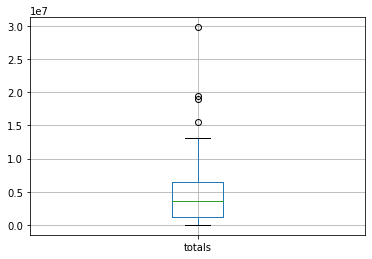

In [41]:
# single variable exploration
# I'll explore the "totals" for the gun data to get a sense of the data
totals = pd.DataFrame(gun_data.groupby('state').sum().totals)
totals.boxplot()

### Research Question 1 What group is most associated with high permits per capita?

In [21]:
# isolate total population, this will be our denominator
total_pop_by_race = pd.DataFrame(census_data.sum(axis = 1), columns = ['population'])
total_pop_by_race['group'] = census_data['Fact']
total_pop_by_race = total_pop_by_race.set_index('group')
total_pop_by_race = total_pop_by_race.reset_index(drop = False)

# print the total population by race
total_pop_by_race

,group,population
0,"American Indian and Alaska Native alone, perce...",2.794712e+06
1,"Asian alone, percent, July 1, 2016, (V2016)",1.496306e+07
2,"Black or African American alone, percent, July...",3.087812e+07
3,"Hispanic or Latino, percent, July 1, 2016, (V...",4.861143e+07
4,Native Hawaiian and Other Pacific Islander alo...,6.663567e+05
5,"Two or More Races, percent, July 1, 2016, (V2...",6.504245e+06
6,"White alone, percent, July 1, 2016, (V2016)",1.879162e+08


In [22]:
# calculate total permits per group per capita and create the final dataset for question 1
q1 = gun_data.sum().totals / total_pop_by_race['population']
q1 = pd.DataFrame(q1)
q1.rename(columns = {"population": "permits_per_capita"}, inplace = True)
q1_labels = pd.DataFrame(['American Indian and Alaska Native', 'Asian', 'Black or African American', 'Hispanic or Latino', 'Native Hawaiian or Other Pacific Islander', 'Two or More Races','White'])
q1['group'] = q1_labels
q1 = q1.set_index('group')

# print the total permits per group per capita
q1

,permits_per_capita
group,
American Indian and Alaska Native,96.476015
Asian,18.019220
Black or African American,8.731835
Hispanic or Latino,5.546487
Native Hawaiian or Other Pacific Islander,404.622062
Two or More Races,41.453333
White,1.434803


Text(0.5, 1.0, 'Permits per Capita by Group')

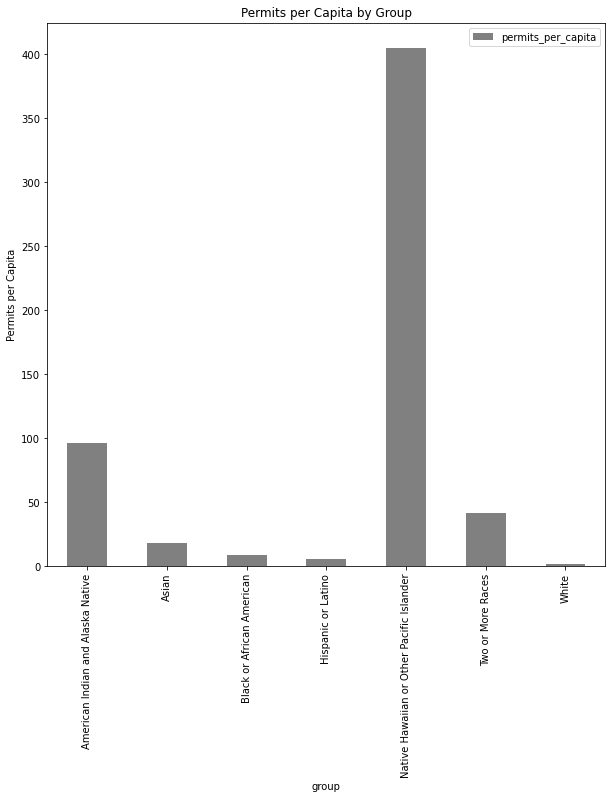

In [49]:
# plot total permits per group per capita
az = q1.plot(kind = 'bar', color = 'grey', figsize = (10,10), rot = 90)
az.set_ylabel('Permits per Capita')
az.set_title('Permits per Capita by Group')

As shown in the graph, the grouping with the largest number of permits per capita is the Native Hawaiian/Other Pacific Islander group.

### Research Question 2  Which states have had the highest growth in gun registrations as measured by increasing background check requests?

In [24]:
# create a pivot of the gun_data
q2_pivot = gun_data.pivot(index = 'month', columns = 'state', values = 'totals')

# convert it to monthly percent change
q2_pivot = q2_pivot.pct_change(fill_method = 'ffill')

# replace na with 0, replace inf with 0
q2_pivot.fillna(0, inplace = True)
q2_pivot.replace(to_replace = np.inf, value = 0, inplace = True)

In [25]:
# calculate the cumulative return by month
for state in q2_pivot.columns:
    q2_pivot[state] = (1 + q2_pivot[state]).cumprod()

In [26]:
# creating the dataset to plot, the cumulative return is the value in the last row
q2_data = q2_pivot.iloc[[-1]]
q2_data = q2_data.reset_index(drop = False)
q2_data = q2_data.melt(id_vars = ['month'], var_name = 'state', value_name = 'value')
q2_data = q2_data.set_index('state')
q2_data.rename(columns = {'value': 'Cumulative Return'}, inplace = True)
q2_data.drop(columns = 'month', inplace = True)

# print the cumulative return over the sample period by state
q2_data

,Cumulative Return
state,
Alabama,30.149718
Alaska,43.468966
Arizona,74.918206
Arkansas,30.130730
California,58.784388
Colorado,57.673633
Connecticut,151.462500
Delaware,63.672727
District of Columbia,0.000000


Text(0, 0.5, 'Cumulative Return')

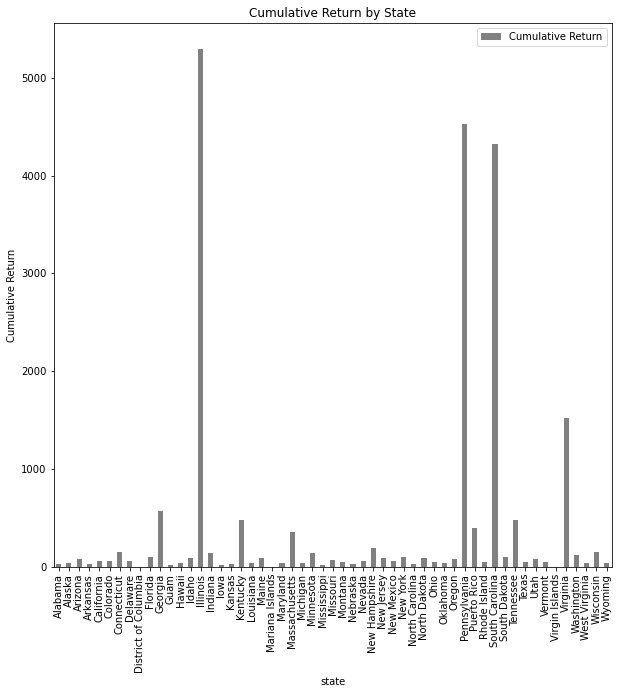

In [46]:
# plot the cumulative return by state
ay = q2_data.plot.bar(y = 'Cumulative Return', figsize = (10,10), color = 'grey', title = 'Cumulative Return by State')
ay.set_ylabel('Cumulative Return')

As shown in the graph, Illinois, Pennsylvania, South Carolina, and Virginia have the largest cumulative return in terms of total permits over the sample period.

### Research Question 3 What is the overall trend of gun purchases?

In [28]:
# create dataframe for question 3
gun_data_by_month = gun_data.groupby('month')['handgun', 'long_gun'].apply(lambda x: x.astype(float).sum())

# print the handgun and long gun data by month
gun_data_by_month

<ipython-input-28-0082f24804f8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gun_data_by_month = gun_data.groupby('month')['handgun', 'long_gun'].apply(lambda x: x.astype(float).sum())


,handgun,long_gun
month,,
1998-11-01,6859.0,11909.0
1998-12-01,213140.0,570882.0
1999-01-01,184496.0,309915.0
1999-02-01,232448.0,352411.0
1999-03-01,241036.0,376775.0
...,...,...
2017-05-01,552018.0,328157.0
2017-06-01,569149.0,331152.0
2017-07-01,480124.0,322264.0


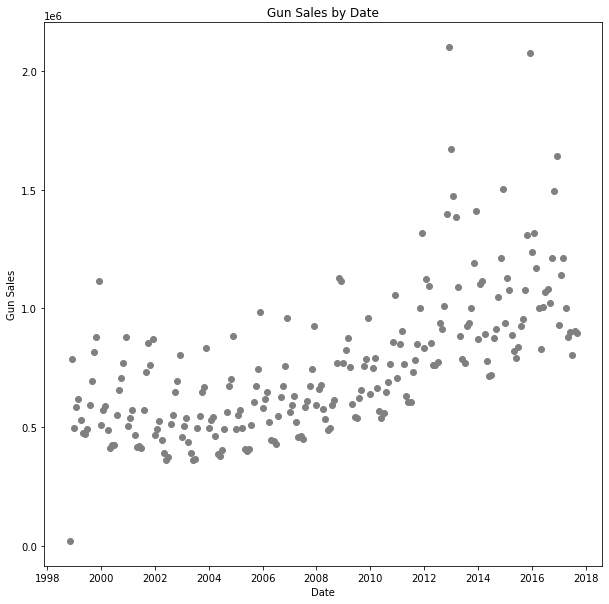

In [42]:
# plotting the total gun sales (handgun + long gun) by date overtime
fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(gun_data_by_month.index.values, gun_data_by_month['handgun'] + gun_data_by_month['long_gun'], color = 'grey')

ax.set(xlabel = 'Date', ylabel ='Gun Sales', title = 'Gun Sales by Date')

plt.show()

As shown in the graph, the number of gun sales has increased throughout the sample period.

<a id='conclusions'></a>
## Conclusions

**What group is most associated with high permits per capita?**

>The group with the highest permits per capita is Native Hawaiian or Other Pacific Islanders.

**Which states have had the highest growth in gun registrations as measured by increasing background check requests?**
>Using the increasing permit requests as a proxy for highest growth in gun registrations over the sample period, the states with the highest growth are Illinois, Pennsylvania, South Carolina, and Virginia.

**What is the overall trend of gun purchases?**
>Using the handgun and long gun permit figures as a proxy for actual gun purhases, the overall trend is increasing over the sample period. There have been notable spikes in 2013 and 2017 but the general amount is increasing.

**Limitations Discussion**
>There are inherent limitations in both our data and the subsequent analysis. The data, as it was presented, is assumed to be factual. Also, we are using the permit data as a proxy for gun sales. It's known that not all gun sales, especially private gun sales, are conducted with a permit check. This means that our conclusions should be taken at face value and this only includes sales where permit checks were requested. Also, there are constraints as our analysis is subject to the historical census data. The gun data exceeds 2016, where the census data ends. As the population is nearly guaranteed to have changed from 2016 to 2018, again, the analysis should be taken at face value.

>Overall, the data was sufficient for our analysis. We'd prefer to have the most accurate data possible, such as real-time census data and real-time gun sale data, but this isn't plausible. As such, the provided data works well as a proxy for our analysis.